<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#pd.read_html" data-toc-modified-id="pd.read_html-1">pd.read_html</a></span></li><li><span><a href="#BeautifulSoup" data-toc-modified-id="BeautifulSoup-2">BeautifulSoup</a></span></li><li><span><a href="#OHLCV" data-toc-modified-id="OHLCV-3">OHLCV</a></span></li></ul></div>

## pd.read_html

In [62]:
import numpy as np
import pandas as pd
%matplotlib inline

In [42]:
df = pd.read_html('https://kind.krx.co.kr/corpgeneral/corpList.do?method=download&searchType=13')[0]
df['종목코드'] = df['종목코드'].map('{:06d}'.format)
df.head(3)

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,DRB동일,004840,고무제품 제조업,"고무벨트(V벨트,콘베이어벨트,평벨트),프라스틱제품 제조,판매",1976-05-21,12월,류영식,http://drbworld.com,부산광역시
1,DSR,155660,1차 비철금속 제조업,합섬섬유로프,2013-05-15,12월,홍석빈,http://www.dsr.com,부산광역시
2,GS,078930,기타 금융업,지주회사/부동산 임대,2004-08-05,12월,"허태수, 홍순기 (각자 대표이사)",NaN,서울특별시


## BeautifulSoup

In [55]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
from pprint import pprint

url = 'https://finance.naver.com/item/sise.naver?code=019170'
with urlopen(url) as doc:
    html = BeautifulSoup(doc)
    pgrr = html.select('table.Nnavi')
    pprint(pgrr)

[]


In [56]:
import FinanceDataReader as fdr
신풍제약 = fdr.DataReader('019170', '2018')
신풍제약

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2018-01-02,7730,7950,7690,7950,449582,0.033810
2018-01-03,8060,8880,7960,8540,2617845,0.074214
2018-01-04,8600,8840,8060,8440,758329,-0.011710
2018-01-05,8450,8980,8450,8940,647279,0.059242
2018-01-08,9030,9390,8780,8800,767722,-0.015660
...,...,...,...,...,...,...
2021-10-18,62300,62300,60500,60500,438183,-0.028892
2021-10-19,60900,62100,60300,61000,481161,0.008264
2021-10-20,61500,62800,60800,60800,497785,-0.003279


## OHLCV

<AxesSubplot:xlabel='Date'>

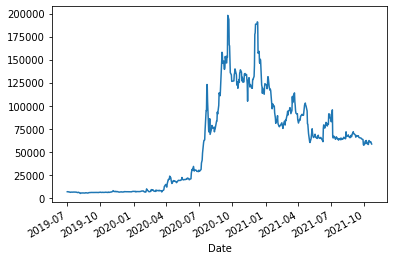

In [66]:
신풍제약 = 신풍제약.dropna()
신풍제약['2019-07':].Close.plot()